# Proyecto Final - Python for Data Science
### Construccion de modelo predictivo de Regresion Lineal
#### Obtencion de Datos

In [67]:
import numpy as np
import pandas as pd
data = np.load("C:\\Users\\Fernando\\Documents\\STUFF\\GALILEO\\1-Python\\16. PROYECTO FINAL\\proyecto_training_data.npy")
before10 = data[0:10, :] #Viendo las primeras 1 filas de los datos.

#Explorando brevemente la estructura de los datos
print(len(data), type(data), len(data[0,:]),len(data[:,0]))
print(before10)

1460 <class 'numpy.ndarray'> 6 1460
[[208500.      7.    856.      8.   2003.     65.]
 [181500.      6.   1262.      6.   1976.     80.]
 [223500.      7.    920.      6.   2001.     68.]
 [140000.      7.    961.      7.   1915.     60.]
 [250000.      8.   1145.      9.   2000.     84.]
 [143000.      5.    796.      5.   1993.     85.]
 [307000.      8.   1694.      7.   2004.     75.]
 [200000.      7.   1107.      7.   1973.     nan]
 [129900.      7.   1022.      8.   1931.     51.]
 [118000.      5.   1077.      5.   1939.     50.]]


#### Dividiendo el data set en 80% para entrenamiento y 20% para prueba. Almacenamos el set de entrenamiento en Pandas.DF

In [122]:
import random
from random import sample

#Dividiendo data set
tr= data[0:round(data.shape[0]*.8),:]
t = data[round(data.shape[0]*.8):,:]
#Almacenando Training set en un Pandas.DF
cols = np.array(["SalePrice", "OverallQual", "1stFloorSqf", "TotRmsAbvGrd", "YearBuilt","LotFrontage"])
tr = pd.DataFrame(data=tr[:,:],columns= cols)
t = pd.DataFrame(data=t[:,:],columns= cols)

#Validacion de registros entre data y el dataframe
data.shape[0]== t.shape[0]+ tr.shape[0]

#Removiendo formato de notacion científica de los datos
np.set_printoptions(suppress=True) 

#### Exploracion de Datos con Numpy

In [5]:
#Media
avg = np.nanmean(tr, axis=0)
#Max
maxx = np.nanmax(tr, axis=0)
#Min
minn = np.nanmin(tr, axis=0)
#rango(peak to peak)
rangos = np.array((cols,minn, maxx))
#sd 
sd = np.nanstd(tr, axis=0)

print('Media=' +'\n'+ str(avg)+2*'\n',
     'Max=' +'\n'+ str(maxx)+2*'\n',
      'Min=' +'\n'+ str(minn)+2*'\n',
      'Rangos=' +'\n'+ str(rangos)+2*'\n',
      'DesvEst=' +'\n'+ str(sd)+2*'\n'
     )

Media=
[180590.27739726      6.1010274    1156.32363014      6.48544521
   1971.45119863     69.94698545]

 Max=
[755000.     10.   3228.     14.   2010.    313.]

 Min=
[34900.     1.   334.     2.  1875.    21.]

 Rangos=
[['SalePrice' 'OverallQual' '1stFloorSqf' 'TotRmsAbvGrd' 'YearBuilt'
  'LotFrontage']
 ['34900.0' '1.0' '334.0' '2.0' '1875.0' '21.0']
 ['755000.0' '10.0' '3228.0' '14.0' '2010.0' '313.0']]

 DesvEst=
[78781.95108033     1.37743519   373.6203315      1.60845172
    29.93888207    23.46595482]




#### Para cada variable en el dataset usar seaborn para graficar  un histograma de la variable.

In [6]:
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set()
fixedtr = tr.dropna(axis=0)
#fixedtr.shape
#type(fixedtr)

#Sale Price
ax = sbn.distplot(tr.iloc[:,0], color='r')
plt.show()

<Figure size 640x480 with 1 Axes>

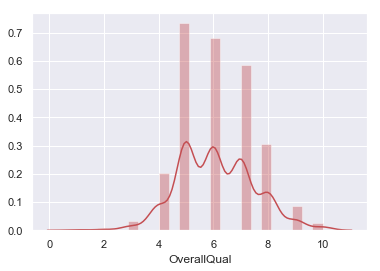

In [7]:
#["OverallQual"]
ax = sbn.distplot(tr.iloc[:,1], color='r')
plt.show()

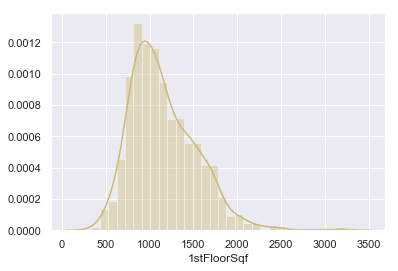

In [8]:
#["1stFloorSqf"]
ax = sbn.distplot(tr.iloc[:,2], color='y')
plt.show()

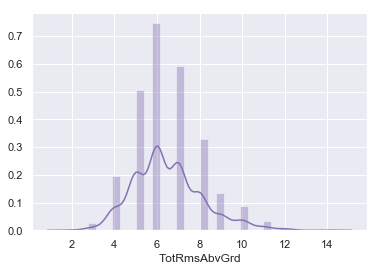

In [9]:
#["TotRmsAbvGrd"]
ax = sbn.distplot(tr.iloc[:,3], color='m')
plt.show()

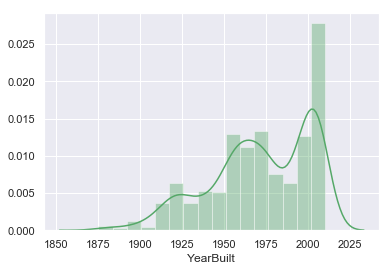

In [10]:
#["YearBuilt"]
ax = sbn.distplot(tr.iloc[:,4], color='g')
plt.show()

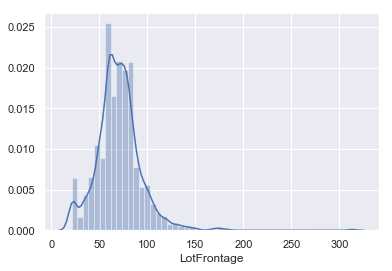

In [11]:
#["LotFrontage"]
ax = sbn.distplot(fixedtr.iloc[:,5], color='b')
plt.show()

#### Para cada variable independiente x: 
##### ○Calcular el coeficiente de correlación entre x y y

In [12]:
pd.set_option('display.max_columns', 10)
corr = tr.corr()
PriceVsX = corr.iloc[0,:] 
#Correlacion entre Precio Venta y todas las variables independientes (caracteristicas-features)
PriceVsX

SalePrice       1.000000
OverallQual     0.793990
1stFloorSqf     0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64

##### ○	Graficar x vs y(scatterplot) usando matplotlib. 
Colocar el coeficiente de correlación como parte del título de la gráfica

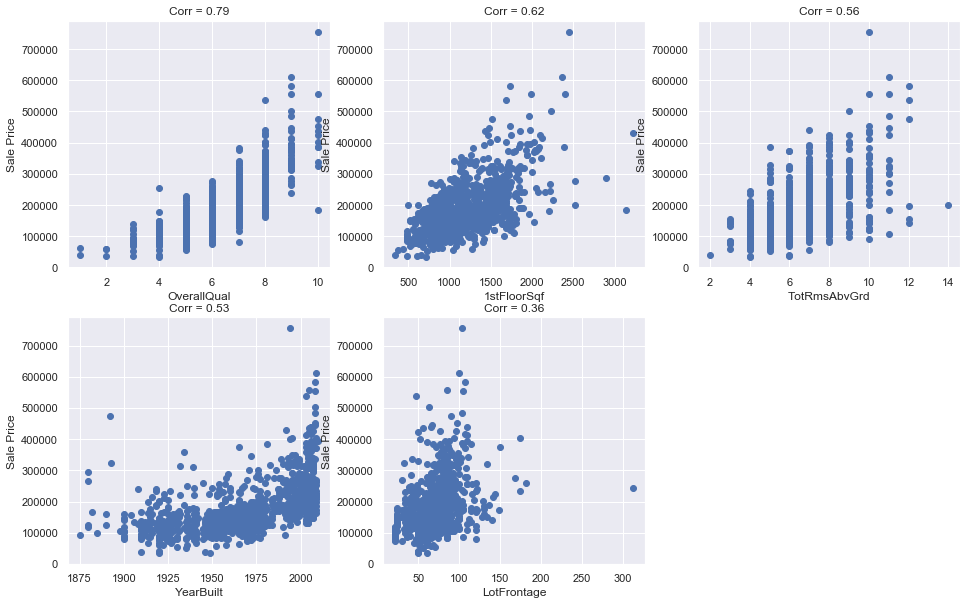

In [13]:
#Recordar que> cols = np.array(["SalePrice", "OverallQual", "1stFloorSqf", "TotRmsAbvGrd", "YearBuilt","LotFrontage"])
fig = plt.figure(figsize=(16,10))
axes = [None]*5
for i in range(1,6,1):
    axes[i-1] = fig.add_subplot(2,3,i)
    axes[i-1].scatter(tr.iloc[:,i],tr.iloc[:,0])
    axes[i-1].set_xlabel(cols[i])
    axes[i-1].set_ylabel('Sale Price')
    axes[i-1].set_title('Corr = '+ np.str(np.round(PriceVsX.iloc[i],2)))
    #plt.savefig('Test.pdf')

plt.show()

#### Crear una función para entrenar un modelo de regresión lineal de una variable 
## y = mx +b

In [14]:
def Training(x,y,epoch,errPrint, lr):
    dat = np.column_stack((x,np.ones_like(x)))
    parameters = [30450, -500]
    err = []
    data = np.array([['','m','b','err'],
                [0,30450,-500,None]])
    model = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])    
    for i in range(1,epoch+1,1):
        yhat = np.matmul(dat,parameters)  #Obteniendo prediccion con datos x y parametros m y b
        err.append(0.5*np.average(np.square(y-yhat))) #Almacenando error
        grad = np.matmul((yhat-y),dat)/len(y) #Obtencion de gradiente
        parameters -= lr*grad #Actualizacion de parametros segun LR y direccion de Gradiente
        
        #Almacenando iteraciones del modelo en Pandas.DF
        model = model.append(pd.Series([parameters[0], parameters[1],err[i-1]], index=model.columns), ignore_index=True)
        if errPrint%i==0:#Impresion de error segun parametro errPrint (imprimir error cada)
            print(model.iloc[i-1,:]) 
    return model, err

x = tr.iloc[:,1]
y = tr.iloc[:,0]
Training(x,y,epoch=800,errPrint=100, lr=0.05)

m      30450
b       -500
err     None
Name: 0, dtype: object
m          30439.9
b           -734.3
err    1.37026e+09
Name: 1, dtype: object
m          30510.4
b         -1187.09
err    1.36816e+09
Name: 3, dtype: object
m          30591.7
b         -1405.47
err    1.36711e+09
Name: 4, dtype: object
m            30720
b         -2532.64
err    1.36195e+09
Name: 9, dtype: object
m        31062.8
b       -4733.16
err    1.352e+09
Name: 19, dtype: object
m         31280.7
b        -5806.27
err    1.3472e+09
Name: 24, dtype: object
m          32043.2
b         -11030.3
err    1.32482e+09
Name: 49, dtype: object
m          33528.8
b         -20579.9
err    1.28729e+09
Name: 99, dtype: object


(           m        b          err
 0      30450     -500         None
 1    30439.9   -734.3  1.37026e+09
 2      30521  -953.81  1.36921e+09
 3    30510.4 -1187.09  1.36816e+09
 4    30591.7 -1405.47  1.36711e+09
 5    30580.6 -1637.73  1.36607e+09
 6    30662.1    -1855  1.36503e+09
 7    30650.5 -2086.25    1.364e+09
 8    30732.1  -2302.4  1.36298e+09
 9      30720 -2532.64  1.36195e+09
 10   30801.8 -2747.69  1.36094e+09
 11   30789.2 -2976.93  1.35993e+09
 12   30871.2 -3190.87  1.35892e+09
 13   30858.1 -3419.11  1.35792e+09
 14   30940.3 -3631.95  1.35692e+09
 15   30926.6  -3859.2  1.35593e+09
 16     31009 -4070.95  1.35494e+09
 17   30994.9 -4297.22  1.35395e+09
 18   31077.4 -4507.87  1.35297e+09
 19   31062.8 -4733.16    1.352e+09
 20   31145.5 -4942.72  1.35103e+09
 21   31130.3 -5167.04  1.35007e+09
 22   31213.2 -5375.52   1.3491e+09
 23   31197.6 -5598.86  1.34815e+09
 24   31280.7 -5806.27   1.3472e+09
 25   31264.5 -6028.65  1.34625e+09
 26   31347.8 -6234.98  1.34

#### Variacion del Error en el Tiempo

m      30450
b       -500
err     None
Name: 0, dtype: object
m          30439.9
b           -734.3
err    1.37026e+09
Name: 1, dtype: object
m          30510.4
b         -1187.09
err    1.36816e+09
Name: 3, dtype: object
m          30591.7
b         -1405.47
err    1.36711e+09
Name: 4, dtype: object
m            30720
b         -2532.64
err    1.36195e+09
Name: 9, dtype: object
m        31062.8
b       -4733.16
err    1.352e+09
Name: 19, dtype: object
m         31280.7
b        -5806.27
err    1.3472e+09
Name: 24, dtype: object
m          32043.2
b         -11030.3
err    1.32482e+09
Name: 49, dtype: object
m          33528.8
b         -20579.9
err    1.28729e+09
Name: 99, dtype: object


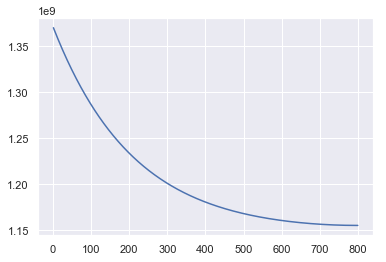

In [15]:
import matplotlib.pyplot as plt1

def ErrInTime(Errors):
    plt1.plot(range(1,len(Errors)+1),Errors)
    return

O=Training(x,y,epoch=800 ,errPrint=100, lr=0.05)
ErrInTime(O[1])

### Variacion del Modelo en el Tiempo

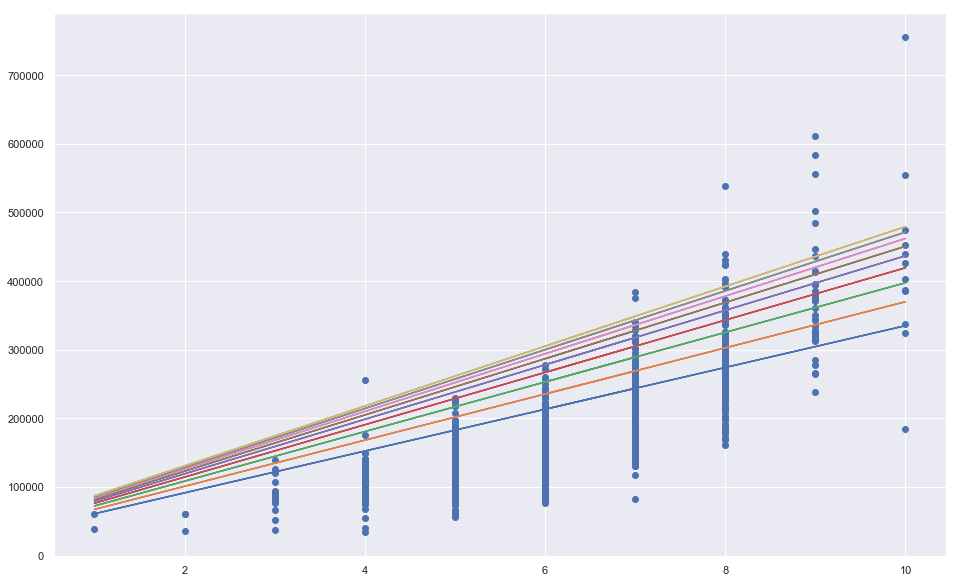

In [121]:
def ModInTime(Mod,n):
    import matplotlib.pyplot as plt2
    fig1 = plt2.figure(figsize=(16,10))
    ax1 = fig1.add_subplot(1,1,1)
    ax1.scatter(tr.iloc[:,1],tr.iloc[:,0])
    steps = range(0,len(Mod.iloc[:,0]),n)
    for step in steps:
        ax1.plot(tr.iloc[:,1],
                 tr.iloc[:,1]*Mod.iloc[step,0]+Mod.iloc[step,0])
    return

plt.show()

ModInTime(Mod=O[0],n=100)


#### Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal y=mx +  b , para cada una de las variables “x” elegidas.
Basándose en las  funciones para graficar las curvas de aprendizaje  y comparación del modelo vs los datos, elegir el número de “epochs” o iteraciones a entrenar el modelo(y experimentar con el learning _rate).

m      30450
b       -500
err     None
Name: 0, dtype: object
m          30439.9
b           -734.3
err    1.37026e+09
Name: 1, dtype: object
m          30510.4
b         -1187.09
err    1.36816e+09
Name: 3, dtype: object
m          30591.7
b         -1405.47
err    1.36711e+09
Name: 4, dtype: object
m            30720
b         -2532.64
err    1.36195e+09
Name: 9, dtype: object
m        31062.8
b       -4733.16
err    1.352e+09
Name: 19, dtype: object
m         31280.7
b        -5806.27
err    1.3472e+09
Name: 24, dtype: object
m          32043.2
b         -11030.3
err    1.32482e+09
Name: 49, dtype: object
m          33528.8
b         -20579.9
err    1.28729e+09
Name: 99, dtype: object


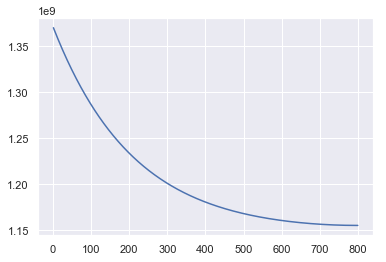

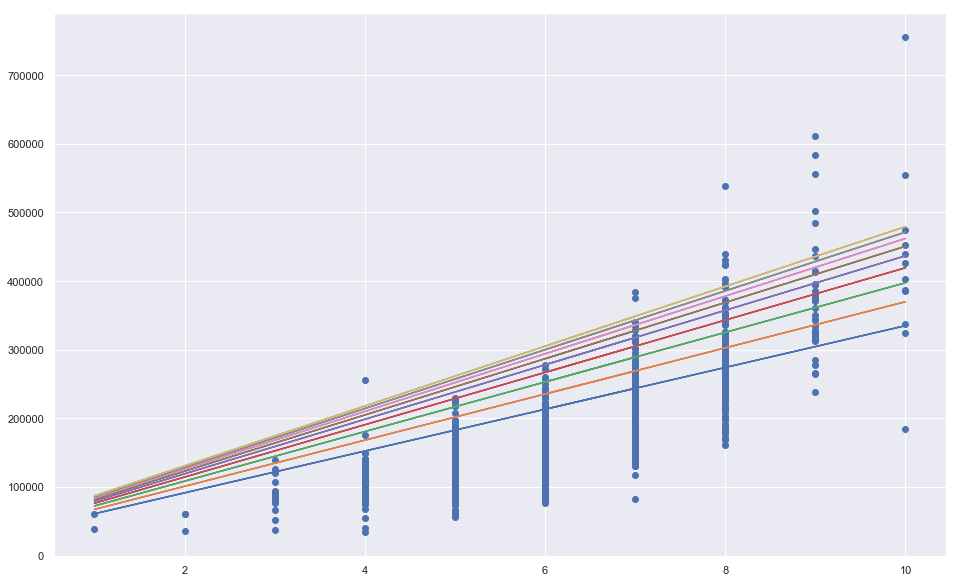

In [41]:
#OVerallQual
y = tr.iloc[:,0] #Price
x = tr.iloc[:,1] #X QUalification

OverallQualf =Training(x,y,epoch=800 ,errPrint=100, lr=0.05)
ErrInTime(OverallQualf[1])
ModInTime(Mod=OverallQualf[0],n=100)


m      30450
b       -500
err     None
Name: 0, dtype: object
m         30136.8
b        -500.245
err    6.7768e+14
Name: 1, dtype: object
m          29520.2
b         -500.728
err    6.50092e+14
Name: 3, dtype: object
m          29216.6
b         -500.966
err    6.36721e+14
Name: 4, dtype: object
m          27745.3
b         -502.118
err    5.73884e+14
Name: 9, dtype: object
m          25022.4
b          -504.25
err    4.66201e+14
Name: 19, dtype: object
m          23763.4
b         -505.236
err    4.20192e+14
Name: 24, dtype: object
m          18362.4
b         -509.464
err    2.49932e+14
Name: 49, dtype: object
m          10984.4
b         -515.241
err    8.84245e+13
Name: 99, dtype: object


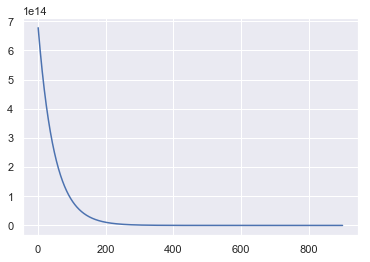

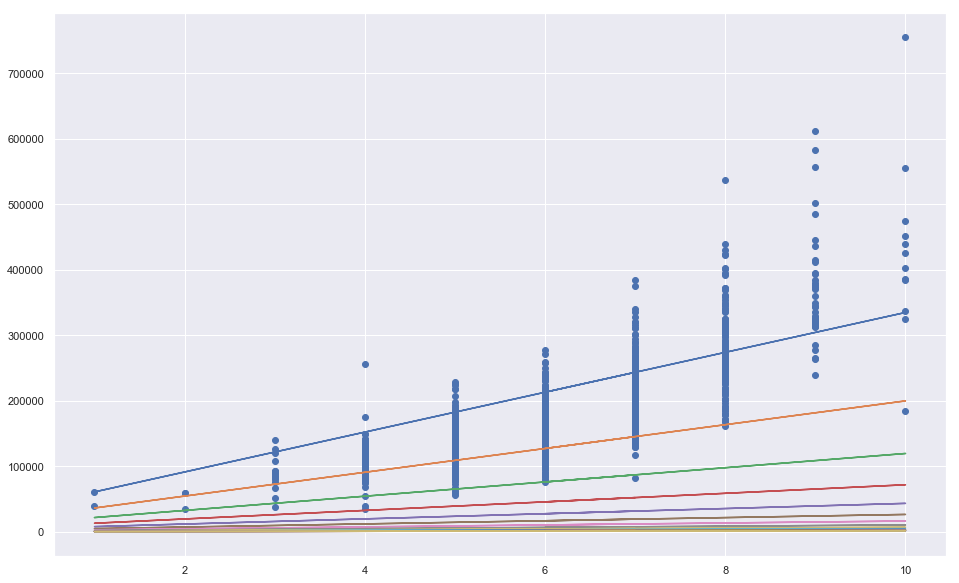

In [72]:
#1stFloorSqf
x2 = tr.iloc[:,2] #X Sqfeets

FstF =Training(x2,y,epoch=900 ,errPrint=100, lr=0.000000007)
ErrInTime(FstF[1])
ModInTime(Mod=FstF[0],n=50)

#### Entrenar un Modelo de Regresión Lineal para cada Variable escogida> OverallQualif & 1stFloorSQf
#### Entrenando Modelos con Caracteristica OvearllQualif

In [70]:
#Training Model with Characteristic: OverallQualf

from sklearn.linear_model import LinearRegression
        
modeL = LinearRegression()
modeL.fit(np.asarray(x).reshape(-1, 1),list(y))

#sklearn Trained Model Coef and Intercept
print(modeL.coef_,
      modeL.intercept_)

#Manually Trained Model Coef and Intercept
print(OverallQualf[0].iloc[-1,0],
      OverallQualf[0].iloc[-1,1])

[45411.99877916] -96469.57131873982
43573.40478616529 -81996.32250149477


####  Entrenando Modelos con Caracteristica 1stFloorSqf

In [73]:
#Training Model with Characteristic: 1tsFloorSqf

modeL2 = LinearRegression()
modeL2.fit(np.asarray(x2).reshape(-1, 1),list(y))

#sklearn Trained Model Coef and Intercept
print(modeL2.coef_,
      modeL2.intercept_)

#Manually Trained Model Coef and Intercept
print(FstF[0].iloc[-1,0],
      FstF[0].iloc[-1,1])

[129.95124229] 30324.585174963664
156.73804045692654 -523.7030170023563


#### Evaluando Predicción de Modelo Manual vs Sklearn 
FUNCION
- Parámetros: Modelo Manual, Modelo Sklearn, X
- Devolver 3 vectores cada uno del mismo tamaño del vector x: Prediccion Manual, Prediccion sklearn, Prediccion Promedio

In [126]:
def EvalPred(mMod,sMod,paramX):
    featM = np.column_stack((paramX, np.ones_like(paramX)))
    mPred = np.matmul(featM,mMod[0].iloc[-1,0:2].astype(float))
    sPred = np.matmul(featM,[sMod.coef_,sMod.intercept_])
    return mPred, sPred, (sPred+mPred)/2

#Evaluando para X> OverallQualif
EvalPred(OverallQualf, modeL, tr.iloc[:,1])

(array([223017.51100166, 179444.1062155 , 223017.51100166, ...,
        223017.51100166, 266590.91578783, 179444.1062155 ]),
 array([221414.42013537, 176002.42135622, 221414.42013537, ...,
        221414.42013537, 266826.41891453, 176002.42135622]),
 array([222215.96556852, 177723.26378586, 222215.96556852, ...,
        222215.96556852, 266708.66735118, 177723.26378586]))

In [127]:
#Evaluando para X> 1stFloorSqf
EvalPred(FstF, modeL2, tr.iloc[:,2])

(array([133644.05961413, 197279.70403964, 143675.29420337, ...,
        234896.8337493 , 264990.53751703, 149788.07778119]),
 array([141562.84857277, 194323.05294136, 149879.72807915, ...,
        225511.35109027, 250461.98960941, 154947.82652835]),
 array([137603.45409345, 195801.3784905 , 146777.51114126, ...,
        230204.09241979, 257726.26356322, 152367.95215477]))

#### Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo.
Para cada variable independiente “x” elegida : 
* Graficar el  error de cada modelo para esta variable “x”
* Concluir cuál modelo para la  variable “x” es el mejor a ser usado 


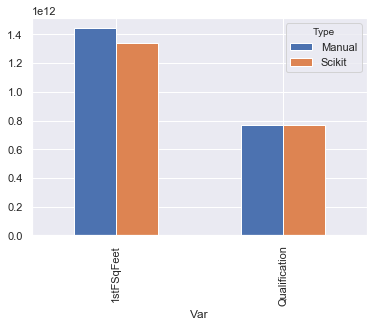

In [164]:
YhatMQ, YhatSQ, YhatAQ = EvalPred(OverallQualf, modeL, t.iloc[:,1])
YhatMF, YhatSF, YhatAF = EvalPred(FstF, modeL2, t.iloc[:,2])

ErrQ = [np.sum(np.square(YhatMQ-t.iloc[:,0])), np.sum(np.square(YhatSQ-t.iloc[:,0]))] 
ErrF = [np.sum(np.square(YhatMF-t.iloc[:,0])), np.sum(np.square(YhatSF-t.iloc[:,0]))]

#mPred, sPred
import matplotlib.pyplot as pltE
df = pd.DataFrame([['Qualification','Manual',ErrQ[0]],['Qualification','Scikit' ,ErrQ[1]],['1stFSqFeet','Manual',ErrF[0]],
                   ['1stFSqFeet','Scikit',ErrF[1]]], columns=['Var','Type','Val'])

df.pivot('Var','Type','Val').plot(kind='bar')
plt.show()



#### En conclusión, el modelo entrenado por ScikitLearn es mejor en ambos casos, aunque en la variable OverallQual es menos apreciable.